# Brisbane VPR Event Reader with Position

In [2]:
import pynmea2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Taken from https://github.com/Tobias-Fischer/ensemble-event-vpr/blob/master/read_gps.py
def get_gps(nmea_file_path):
    nmea_file = open(nmea_file_path, encoding='utf-8')

    latitudes, longitudes, timestamps = [], [], []

    first_timestamp = None
    previous_lat, previous_lon = 0, 0

    for line in nmea_file.readlines():
        try:
            msg = pynmea2.parse(line)
            if first_timestamp is None:
                first_timestamp = msg.timestamp
            if msg.sentence_type not in ['GSV', 'VTG', 'GSA']:
                # print(msg.timestamp, msg.latitude, msg.longitude)
                # print(repr(msg.latitude))
                dist_to_prev = np.linalg.norm(np.array([msg.latitude, msg.longitude]) - np.array([previous_lat, previous_lon]))
                if msg.latitude != 0 and msg.longitude != 0 and msg.latitude != previous_lat and msg.longitude != previous_lon and dist_to_prev > 0.0001:
                    timestamp_diff = (msg.timestamp.hour - first_timestamp.hour) * 3600 + (msg.timestamp.minute - first_timestamp.minute) * 60 + (msg.timestamp.second - first_timestamp.second)
                    latitudes.append(msg.latitude); longitudes.append(msg.longitude); timestamps.append(timestamp_diff)
                    previous_lat, previous_lon = msg.latitude, msg.longitude

        except pynmea2.ParseError as e:
            # print('Parse error: {} {}'.format(msg.sentence_type, e))
            continue

    return np.array(np.vstack((latitudes, longitudes, timestamps))).T

In [4]:
nmeaPaths = [
    "/media/geoffroy/T7/BrisbaneDataset/daytime/20200424_151015-daytime_concat.nmea",
    "/media/geoffroy/T7/BrisbaneDataset/morning/20200428_091154-morning_concat.nmea",
    "/media/geoffroy/T7/BrisbaneDataset/night/20200427_181204-night_concat.nmea",
    "/media/geoffroy/T7/BrisbaneDataset/sunrise/20200429_061912-sunrise_concat.nmea",
    "/media/geoffroy/T7/BrisbaneDataset/sunset1/20200421_170039-sunset1_concat.nmea",
    "/media/geoffroy/T7/BrisbaneDataset/sunset2/20200422_172431-sunset2_concat.nmea",
]

In [5]:
coordinates = []
for nmea in nmeaPaths:
    coordinates.append(get_gps(nmea))

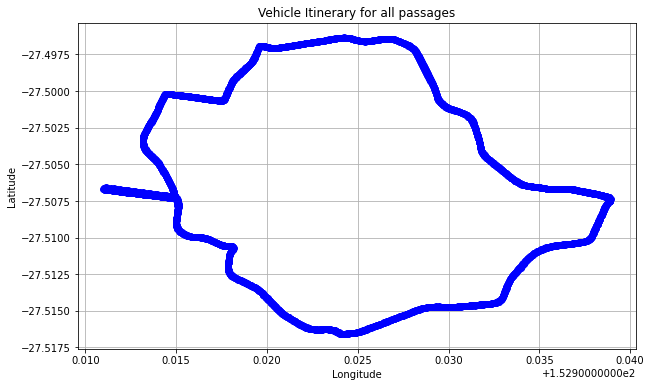

In [6]:
plt.figure(figsize=(10, 6))
for coordinate in coordinates:
    longitudes = coordinate.T[1]
    latitudes = coordinate.T[0]
    
   
    plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='b')
    plt.title('Vehicle Itinerary for all passages')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

# Select a random place and see selected events with temporal window = 1s

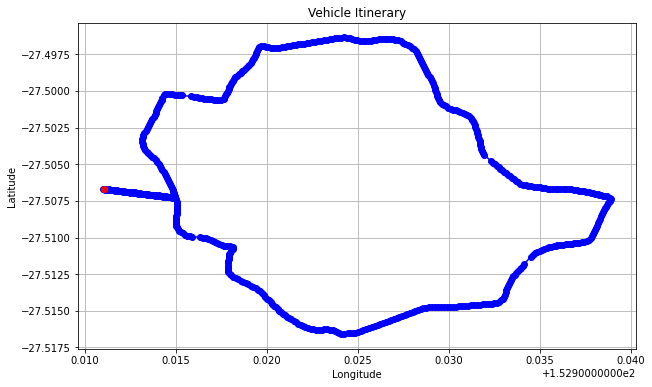

In [7]:
import random
selectedPoint = random.randint(0, len(longitudes) - 1)
selectedPoint = 0


plt.figure(figsize=(10, 6))
longitudes = coordinates[0].T[1]
latitudes = coordinates[0].T[0]

plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='b')
plt.plot(longitudes[selectedPoint], latitudes[selectedPoint], marker='o', color='r')
plt.title('Vehicle Itinerary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

In [8]:
video_beginning = {
    'sunset1': 1587452582.35,
    'sunset2': 1587540271.65,
    'daytime': 1587705130.80,
    'morning': 1588029265.73,
    'sunrise': 1588105232.91,
    'night': 1587975221.10
}

In [9]:
eventsPaths = ["/media/geoffroy/T7/BrisbaneDataset/ensemble-event-vpr/output/dvs_vpr_2020-04-24-15-12-03.txt"]

timestamp = coordinates[0].T[2][selectedPoint]
print(timestamp)

i=0

events = []
with open(eventsPaths[0]) as fp:
    for line in fp:
        line = line.strip('\n').split(' ')
        
        timestamp = np.float128(line[0]) - 1587705130.80
        
        i += 1
        # if(timestamp > 0):
        #     break
        if len(line) > 2: # Skip intro line
            events.append([line[1], line[2], line[3]]) # X Y Timestamp
    print(event)

0.0


KeyboardInterrupt: 